Eucladian Distance Formula


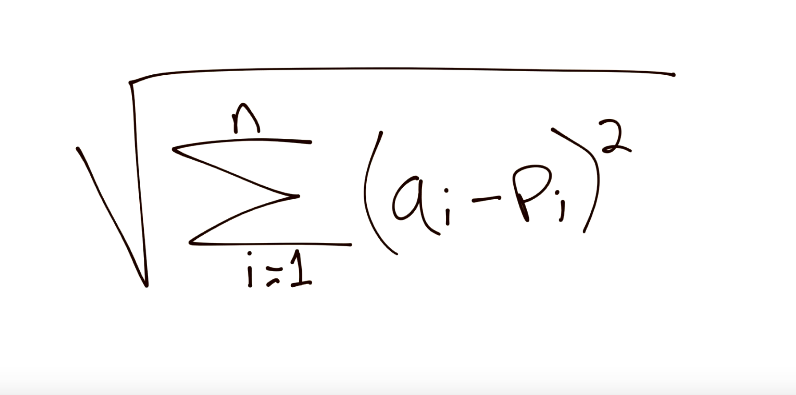

In [1]:
from IPython.display import Image
print("Eucladian Distance Formula")
Image(filename='distance.png')

In [2]:
from math import sqrt

In [4]:
euclidean_distance = sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)

2.23606797749979


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
from matplotlib import style
style.use('fivethirtyeight')

In [13]:
dataset = { 'k': [[1,2], [2,3], [3,1]], 'r': [[6,5],[7,7],[8,6]] }
new_features = [5,7]

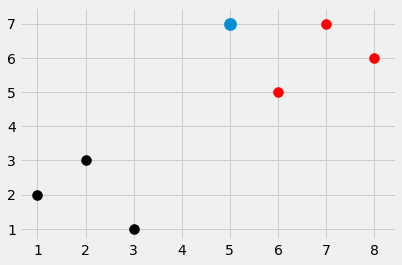

In [17]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=150)
plt.show()

#### Using Numpy's implementation of eculidean distance as it's fast then our implementation

In [59]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
#     print(Counter(votes).most_common(1))
            
    return vote_result, confidence

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

('r', 1.0)


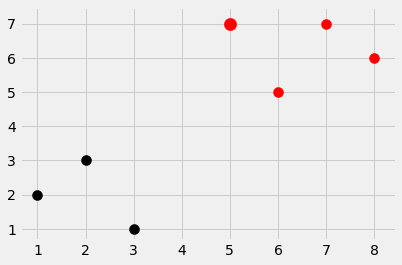

In [38]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=150, color=result)
plt.show()

In [25]:
import pandas as pd
import random

In [27]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [31]:
random.shuffle(full_data)
print(full_data[:5])

[[10.0, 10.0, 10.0, 6.0, 8.0, 4.0, 8.0, 5.0, 1.0, 4.0], [10.0, 3.0, 4.0, 5.0, 3.0, 10.0, 4.0, 1.0, 1.0, 4.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [33]:
test_size = 0.2
train_set ={2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [34]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

In [35]:
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [63]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=3)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:', correct/total)
print('Confidence', confidence)

1.0
1.0
1.0
0.6666666666666666
Accuracy: 0.9712230215827338
Confidence 1.0


##### K = 3, Accuracy = 0.9712230215827338 (2nd)
##### K = 4, Accuracy = 0.9712230215827338 (2nd)
##### K = 5, Accuracy = 0.9640287769784173 (3rd)
##### K= 6, Accuracy = 0.9640287769784173 (3rd)
#### K = 7, Accuracy =  0.9784172661870504 (best)
##### K = 8, Accuracy = 0.9640287769784173 (3rd)
##### K = 9, Accuracy = 0.9712230215827338 (2nd)
##### It's boucing between those 3 accuracy level

In [65]:
accuracies = []
for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)
    test_size = 0.2
    train_set ={2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]
    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote,confidence = k_nearest_neighbors(train_set, data, k=3)
            if group == vote:
                correct += 1
            total += 1
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

0.9654676258992803


In [67]:
from sklearn import preprocessing, cross_validation, neighbors
accuracies = []
for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    X = np.array(df.drop(['class'], 1))
    y = np.array(df['class'])
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    
print(sum(accuracies)/len(accuracies))

# To hide warnings
warnings.filterwarnings('ignore')

0.9679999999999996


#### Feature of sklearn KNN
* It can be threaded
* It is fast
* Parallel